<a href="https://colab.research.google.com/github/chengze123/Frist_python/blob/master/420tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow_text

     |████████████████████████████████| 3.4MB 17.0MB/s 


In [2]:
pip install tf-models-official

     |████████████████████████████████| 1.1MB 17.1MB/s 
     |████████████████████████████████| 51kB 5.3MB/s 
     |████████████████████████████████| 37.6MB 1.3MB/s 
     |████████████████████████████████| 358kB 42.2MB/s 
     |████████████████████████████████| 1.2MB 29.9MB/s 
     |████████████████████████████████| 174kB 53.1MB/s 
     |████████████████████████████████| 102kB 9.4MB/s 
     |████████████████████████████████| 706kB 43.2MB/s 
     |████████████████████████████████| 645kB 45.6MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-cp37-none-any.whl size=16172 sha256=a2a8f44b005dcbd85198a8c3f00d8ef9c12fcfcc860e84621141bc4b2fbaeb82
  Stored in directory: /root/.cache/pip/wheels/52/df/1b/45d75646c37428f7e626214704a0e35bd3cfc32eda37e59e5f
  Created wheel for py-cpuinfo: filename=py_cpuinfo-8.0.0-cp37-none-any.whl size=22245 sha256=570c3a48f74958e40e96e83540323baf225d591ab1135b744e45bb5d8289b85e
  Stored in directory: /root/.cache/pip/wheels/2e/15/f5/aa2a056d223903b52cf48701

In [8]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optmizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

In [10]:
#从网上下载数据集压缩包，因为我们是从本地传入所以不需要
#url = ''https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz''

#解压缩，因为我们从本地传入并不需要
#dataset = tf.keras.utils.get_file('train', url,
                                  #untar=True, cache_dir='.',
                                  #cache_subdir='')

dataset_dir = os.path.join(os.path.dirname('./content/data'), 'train')

train_dir = os.path.join(dataset_dir, 'qinggan')

# remove unused folders to make it easier to load the data
#remove_dir = os.path.join(train_dir, 'unsup')
#shutil.rmtree(remove_dir)

In [13]:
AUTOTUNE = tf.data.AUTOTUNE
batch_size = 32
seed = 42

raw_train_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'data/train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed)

class_names = raw_train_ds.class_names
train_ds = raw_train_ds.cache().prefetch(buffer_size=AUTOTUNE)

val_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'data/train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=seed)

val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

test_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'data/test',
    batch_size=batch_size)

test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 10 files belonging to 3 classes.
Using 8 files for training.
Found 10 files belonging to 3 classes.
Using 2 files for validation.
Found 5 files belonging to 3 classes.


In [37]:
for text_batch, label_batch in train_ds.take(1):
  for i in range(8):
    #raw_text是一组数组
    raw_text=text_batch.numpy()
    #这个输出乱码了
    print(f'Review: {raw_text[i]}')
    #用decode转码
    print(raw_text[i].decode("utf-8"))

    label = label_batch.numpy()[i]
    print(f'Label : {label} ({class_names[label]})')

Review: b'\xe7\x9b\xae\xe5\x89\x8d\xef\xbc\x8c\xe5\x85\xac\xe5\x8f\xb8\xe9\xa1\xb9\xe7\x9b\xae\xe5\x88\x86\xe5\xb8\x83\xe5\x9c\xa8\xe5\x8c\x97\xe4\xba\xac\xe3\x80\x81\xe4\xb8\x8a\xe6\xb5\xb7\xe3\x80\x81\xe6\xb7\xb1\xe5\x9c\xb3\xe3\x80\x81\xe6\x88\x90\xe9\x83\xbd\xe3\x80\x81\xe9\x87\x8d\xe5\xba\x86\xe3\x80\x81\xe5\x8e\xa6\xe9\x97\xa8\xe7\xad\x89\xe5\x8d\x81\xe4\xb8\x83\xe4\xb8\xaa\xe5\x9f\x8e\xe5\xb8\x82\xef\xbc\x8c\xe6\x97\x97\xe4\xb8\x8b\xe6\x8b\xa5\xe6\x9c\x89\xe5\xa4\x9a\xe4\xb8\xaa\xe4\xba\xa7\xe5\x93\x81\xe7\xba\xbf\xe3\x80\x82  \t0'
目前，公司项目分布在北京、上海、深圳、成都、重庆、厦门等十七个城市，旗下拥有多个产品线。  	0
Label : 1 (luoji)
Review: b'\xe8\xbf\x99\xe4\xb8\x80\xe5\xb9\xb4\xe5\x85\xac\xe5\x8f\xb8\xe5\x87\x86\xe7\xa1\xae\xe7\xa0\x94\xe5\x88\xa4\xe5\xb8\x82\xe5\x9c\xba\xe8\xb5\xb0\xe5\x8a\xbf\xef\xbc\x8c\xe5\x90\x88\xe7\x90\x86\xe6\x8e\xa7\xe5\x88\xb6\xe9\xa1\xb9\xe7\x9b\xae\xe5\xbc\x80\xe5\x8f\x91\xe9\x94\x80\xe5\x94\xae\xe8\x8a\x82\xe5\xa5\x8f\xef\xbc\x8c\xe5\xae\x9e\xe7\x8e\xb0\xe4\xba\x86\xe5\x85\xac\xe5\x

In [39]:
bert_model_name = 'bert_zh_L-12_H-768_A-12' 
#中文版模型 https://tfhub.dev/tensorflow/bert_zh_L-12_H-768_A-12/4

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
    'bert_zh_L-12_H-768_A-12':'https://tfhub.dev/tensorflow/bert_zh_L-12_H-768_A-12/4'
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_zh_L-12_H-768_A-12':'https://tfhub.dev/tensorflow/bert_zh_preprocess/3'

}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/bert_zh_L-12_H-768_A-12/4
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_zh_preprocess/3


In [40]:
#预处理模型
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [42]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [43]:
text_test = ['万科保证本报告内容不存在任何虚假记载、误导性陈述或重大遗漏。']
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_mask', 'input_type_ids', 'input_word_ids']
Shape      : (1, 128)
Word Ids   : [ 101  674 4906  924 6395 3315 2845 1440 1079 2159  679 2100]
Input Mask : [1 1 1 1 1 1 1 1 1 1 1 1]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [44]:
#使用bert模型
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [45]:
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/bert_zh_L-12_H-768_A-12/4
Pooled Outputs Shape:(1, 768)
Pooled Outputs Values:[ 0.99866563  0.9996423   0.98777777  0.8717656   0.9636704   0.3215581
 -0.8227077   0.30739298  0.9833528  -0.9979714   0.99992085  0.9987444 ]
Sequence Outputs Shape:(1, 128, 768)
Sequence Outputs Values:[[ 0.68239725  0.5577215   0.09849375 ... -0.01237792 -0.706184
   0.6503175 ]
 [-0.8962562   0.4492362   1.2394017  ... -0.97078013 -0.19347236
   0.09974515]
 [ 0.32081974  0.6410011   0.88046044 ...  0.43439108 -0.1528737
   0.6800312 ]
 ...
 [ 0.5200127  -0.45156938  0.62698627 ...  0.8195816  -0.4332544
   0.72958666]
 [ 0.49132037 -0.36749634  0.7497952  ... -0.10207826  0.5405131
   0.6284633 ]
 [ 0.8987839  -0.38201672 -0.52844596 ...  0.7393296   0.9631606
   0.7311599 ]]


In [46]:
#定义模型
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [47]:
classifier_model = build_classifier_model()
bert_raw_result = classifier_model(tf.constant(text_test))
print(tf.sigmoid(bert_raw_result))

tf.Tensor([[0.7662549]], shape=(1, 1), dtype=float32)


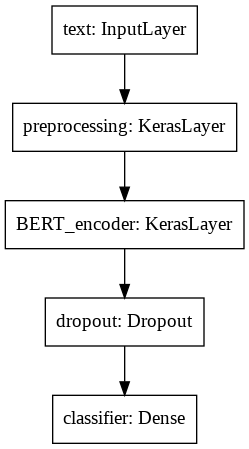

In [48]:
#查看模型结构
#tf.keras.utils.plot_model(classifier_model)

In [50]:
#损失函数
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

In [51]:
#分类器
epochs = 5
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                            num_train_steps=num_train_steps,
                            num_warmup_steps=num_warmup_steps,
                            optimizer_type='adamw')

In [52]:
#加载BERT模型并进行训练
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [53]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=train_ds,
                               validation_data=val_ds,
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/bert_zh_L-12_H-768_A-12/4
Epoch 1/5
1/1 [==============================] - 35s 35s/step - loss: -0.1116 - binary_accuracy: 0.5000 - val_loss: -1.1947 - val_binary_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 13s 13s/step - loss: -1.1103 - binary_accuracy: 0.5000 - val_loss: -1.4931 - val_binary_accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 13s 13s/step - loss: -1.5176 - binary_accuracy: 0.5000 - val_loss: -1.6159 - val_binary_accuracy: 0.5000
Epoch 4/5
1/1 [==============================] - 13s 13s/step - loss: -1.4943 - binary_accuracy: 0.5000 - val_loss: -1.7517 - val_binary_accuracy: 0.5000
Epoch 5/5
1/1 [==============================] - 13s 13s/step - loss: -1.9425 - binary_accuracy: 0.5000 - val_loss: -1.8398 - val_binary_accuracy: 0.5000


In [54]:
#评估模型
loss, accuracy = classifier_model.evaluate(test_ds)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

1/1 [==============================] - 2s 2s/step - loss: -0.5768 - binary_accuracy: 0.8000
Loss: -0.5767850875854492
Accuracy: 0.800000011920929


dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


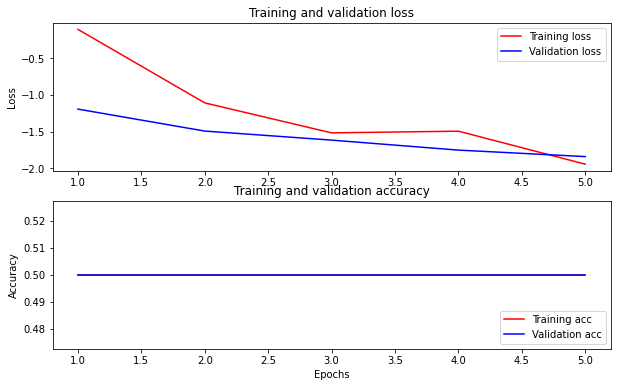

In [55]:
#绘制出随时间变化的准确性和损失
history_dict = history.history
print(history_dict.keys())

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [56]:
dataset_name = 'data'
saved_model_path = './{}_bert'.format(dataset_name.replace('/', '_'))

classifier_model.save(saved_model_path, include_optimizer=False)

In [57]:
reloaded_model = tf.saved_model.load(saved_model_path)

In [58]:
def print_my_examples(inputs, results):
  result_for_printing = \
    [f'input: {inputs[i]:<30} : score: {results[i][0]:.6f}'
                         for i in range(len(inputs))]
  print(*result_for_printing, sep='\n')
  print()


examples = [
    '我们要保护环境，为绿色环保做贡献，加强绿色工业化战略推进，并力争拿出新的解决方案。',  # this is the same sentence tried earlier
    '2017年开始，我们在城中村尝试将部分旧楼改造为长租公寓，为在城市内打拼的年轻人和家庭提供品质更高的居住环境。所有这些，都是时代赋予我们的责任。',
    '我们致力于构建服务客户和城乡的生态平台，为普通人的健康幸福生活提供好产品与好服务，成为推动城乡建设发展、社会和谐进步、人民美好生活的建设性力量。',
    '未来我们将继续发展物业服务、长租公寓、商业、物流、教育、养老、滑雪度假等业务，一如既往地把人民对美好生活的向往作为每个万科人的奋斗目标。',
    '第二个领域是美好生活、消费升级。'
]

reloaded_results = tf.sigmoid(reloaded_model(tf.constant(examples)))
original_results = tf.sigmoid(classifier_model(tf.constant(examples)))

print('Results from the saved model:')
print_my_examples(examples, reloaded_results)
print('Results from the model in memory:')
print_my_examples(examples, original_results)

Results from the saved model:
input: 我们要保护环境，为绿色环保做贡献，加强绿色工业化战略推进，并力争拿出新的解决方案。 : score: 0.973823
input: 2017年开始，我们在城中村尝试将部分旧楼改造为长租公寓，为在城市内打拼的年轻人和家庭提供品质更高的居住环境。所有这些，都是时代赋予我们的责任。 : score: 0.954879
input: 我们致力于构建服务客户和城乡的生态平台，为普通人的健康幸福生活提供好产品与好服务，成为推动城乡建设发展、社会和谐进步、人民美好生活的建设性力量。 : score: 0.968976
input: 未来我们将继续发展物业服务、长租公寓、商业、物流、教育、养老、滑雪度假等业务，一如既往地把人民对美好生活的向往作为每个万科人的奋斗目标。 : score: 0.969788
input: 第二个领域是美好生活、消费升级。               : score: 0.849193

Results from the model in memory:
input: 我们要保护环境，为绿色环保做贡献，加强绿色工业化战略推进，并力争拿出新的解决方案。 : score: 0.973823
input: 2017年开始，我们在城中村尝试将部分旧楼改造为长租公寓，为在城市内打拼的年轻人和家庭提供品质更高的居住环境。所有这些，都是时代赋予我们的责任。 : score: 0.954879
input: 我们致力于构建服务客户和城乡的生态平台，为普通人的健康幸福生活提供好产品与好服务，成为推动城乡建设发展、社会和谐进步、人民美好生活的建设性力量。 : score: 0.968976
input: 未来我们将继续发展物业服务、长租公寓、商业、物流、教育、养老、滑雪度假等业务，一如既往地把人民对美好生活的向往作为每个万科人的奋斗目标。 : score: 0.969788
input: 第二个领域是美好生活、消费升级。               : score: 0.849193



In [ ]:
#导入正则模块
#import re
#创建rm_tags函数，输入参数text文字
#def rm_tags(text):
    #创建re_tag为正规表达式变量，且赋值为：'<[^>]+>'
    #re_tag=re.compile(r'<[^>]+>')
    #将text文字中符合正则表达式条件的字符替换成空字符串
    #return re_tag.sub('',text)

In [ ]:
#读取文件
#import os
#创建read_files函数，输入参数filetype
#读取训练数据时filetype参数会传入"train"
#读取测试数据时filetype参数会传入"test"
#def read_files(filetype):
    #读取存取文件的路径
    #path="./data/"#/content/data/train
    #创建文件列表
    #file_list=[]
    
    #设置正面评价的文件目录为positive_path
    #positive_path=path+filetype+"/qinggan/"
    #使用for循环将positive_path目录下所有的文件加入file_list
    #for f in os.listdir(positive_path):
        #file_list+=[positive_path+f]
    #设置负面评价的文件目录为negative_path
    #negative_path=path+filetype+"/neg/"
    #使用for循环将positive_path目录下所有的文件加入file_list
    #for f in os.listdir(negative_path):
        #file_list+=[negative_path+f]
    #显示当前读取的filetype(train或test)目录下的文件个数
    #print('read',filetype,'files:',len(file_list))
    #前12500项是正面，故产生12500项1的列表；后12500项是负面，故产生12500项0的列表
    #all_labels=([1]*2+[0]*0)
    #设置all_texts为空列表
    #all_texts=[]
    #fi读取file_list所有文件：
    #使用open()打开文件使用file_input.readlines()读取文件，并使用join连接所有的文件内容
    #用rm_tags删除tag,最后加入all_text list中
    #for fi in file_list:
        #with open(fi,encoding='utf-8') as file_input:
            #all_texts+=[rm_tags(" ".join(file_input.readlines()))]
    #return all_labels,all_texts

In [ ]:
#使用read_files函数传入参数"train"读取训练数据
#y_train,train_text=read_files("train")
#train_text[0]
#y_train[0]

read train files: 2


'这一年我们迎来了十九大，为新时代的发展指明了方向；迎来了改革的春风，为企业的未来点亮了希望；迎来了新一届的领导班子，带领振业奋勇向前，开启新征程。\t\t1'